# Assignment 2

## Data Exploration

In [1]:
import os as os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm

In [2]:
trainPath = '../training'
testPath = '../test'

trainDir = os.listdir(trainPath)
testDir = os.listdir(testPath)


def getData(location):
    lst = []
    for directory in trainDir:
        dataDir =  os.listdir(location + '/' + directory)
        for fileName in dataDir:
            fullPath =  location + '/' + directory + '/' + fileName
            file = open(fullPath,'r')
            lst.append([fullPath, directory, file.read()])
            file.close()
    return lst
        
traindf = pd.DataFrame(getData(trainPath), columns=['dir','category','text'])
testdf = pd.DataFrame(getData(testPath), columns=['dir','category','text'])

In [3]:
traindf = traindf.sample(frac=1).reset_index(drop=True)
testdf = testdf.sample(frac=1).reset_index(drop=True)

In [4]:
traindf.head()

,dir,category,text
0,../training/C18/0000467,C18,Effects of fish oil supplements in NIDDM subje...
1,../training/C12/0008771,C12,Serum levels of sex hormone binding globulin a...
2,../training/C10/0004104,C10,Thermographic findings in cranio-facial pain.\...
3,../training/C19/0004271,C19,Adrenal medullitis in type I diabetes.\n To in...
4,../training/C18/0005457,C18,An unusual complication of silastic dural subs...


In [5]:
testdf.head()

,dir,category,text
0,../test/C23/0015384,C23,Bacterial overgrowth and intestinal atrophy in...
1,../test/C04/0014183,C04,Cyclosporine in the treatment of cutaneous T c...
2,../test/C23/0001248,C23,An improved technique for development of the p...
3,../test/C23/0014683,C23,Repeat operation for failure of antireflux pro...
4,../test/C02/0001895,C02,Polymerase chain reaction evidence for human i...


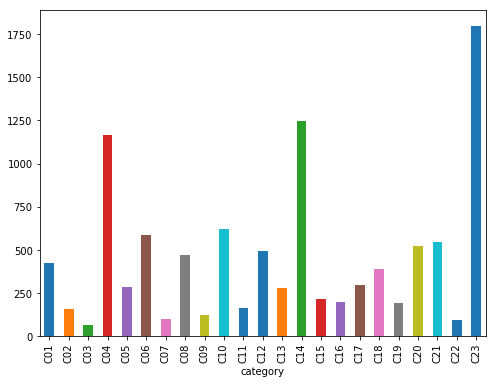

In [6]:
fig = plt.figure(figsize=(8,6))
traindf.groupby('category').dir.count().plot.bar(ylim=0)
plt.show()

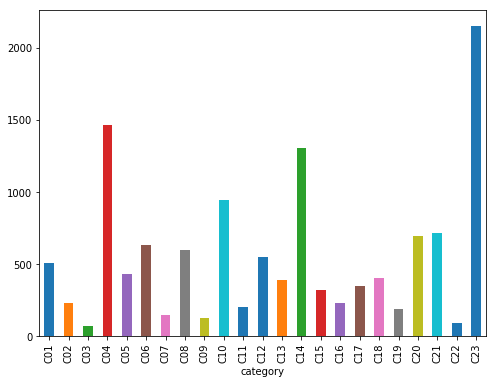

In [7]:
fig = plt.figure(figsize=(8,6))
testdf.groupby('category').dir.count().plot.bar(ylim=0)
plt.show()

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer(encoding='latin-1', stop_words='english')
vectorizer.fit(traindf['text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='latin-1', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [9]:
analyze = vectorizer.build_analyzer()

def wordCount(category,topWords):
    data = []
    categoryTexts = traindf.loc[traindf['category'] == category]
    for text in categoryTexts['text'].values:
        data.append(analyze(text))
    df = pd.DataFrame([item for sublist in data for item in sublist],columns=['word'])
    print('Top {0} words of '.format(topWords)+ category + ': ')
    return df.groupby('word').word.count().sort_values(ascending = False)[:topWords]

#fig = plt.figure(figsize=(12,10))
print(wordCount('C07',7))
print(wordCount('C02',7))
print(wordCount('C20',7))
print(wordCount('C11',7))

Top 7 words of C07: 
word
patients       116
treatment       57
periodontal     45
disease         40
primary         38
oral            38
parotid         36
Name: word, dtype: int64
Top 7 words of C02: 
word
patients            248
virus               198
hiv                 190
infection           189
human               138
immunodeficiency    101
infected             89
Name: word, dtype: int64
Top 7 words of C20: 
word
patients     1095
hiv           658
infection     418
cells         368
cell          350
aids          346
disease       331
Name: word, dtype: int64
Top 7 words of C11: 
word
patients    266
retinal     126
eyes        107
eye          73
visual       69
disease      67
cases        61
Name: word, dtype: int64


## Preproccessing and Feature Extraction

In [10]:
trainDocs = traindf['text'].values
testDocs = testdf['text'].values


In [11]:
#train_x, valid_x, train_y, valid_y = model_selection.train_test_split(traindf['text'], traindf['category'],test_size = 0.2)
train_x = traindf['text'].values
train_y = traindf['category'].values
test_x = testdf['text'].values
test_y = testdf['category'].values

print('train_x shape: {0}'.format(train_x.shape))
print('test_x shape {0}:'.format(testdf['text'].values.shape))
print('train_y shape: {0}'.format(train_y.shape))
print('test_y shape {0}:'.format(testdf['category'].values.shape))

train_x shape: (10433,)
test_x shape (12733,):
train_y shape: (10433,)
test_y shape (12733,):


In [12]:
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
test_y = encoder.fit_transform(test_y)
test_y.shape

(12733,)

### Count Vectors

#### 1-Word Grams

In [13]:
train_x_count =  vectorizer.transform(train_x)
test_x_count =  vectorizer.transform(test_x)

print(train_x_count.shape)
print(test_x_count.shape)

(10433, 30198)
(12733, 30198)


#### 2-Word Grams 

In [14]:
vectorizer2 = CountVectorizer(encoding='latin-1', stop_words='english', ngram_range=(1, 2))
vectorizer2.fit(traindf['text'])
analyze2 = vectorizer2.build_analyzer()

train_x_count2 =  vectorizer2.transform(train_x)
test_x_count2 =  vectorizer2.transform(test_x)

print(train_x_count2.shape)
print(test_x_count2.shape)

(10433, 463008)
(12733, 463008)


### TF-IDF

In [15]:
vectorizerTFIDF = TfidfVectorizer(sublinear_tf=True, max_df=0.5,analyzer='word', encoding='latin-1', stop_words='english', ngram_range=(1, 3))
vectorizerTFIDF.fit(traindf['text'])
analyzeTFIDF = vectorizerTFIDF.build_analyzer()

train_x_tfidf =  vectorizerTFIDF.transform(train_x)
test_x_tfidf =  vectorizerTFIDF.transform(test_x)

print(train_x_tfidf.shape)
print(test_x_tfidf.shape)

(10433, 1076882)
(12733, 1076882)


In [16]:
import pickle

## Model Fitting


### SVM

#### SVM with 1-gram vector :

In [17]:

svm1= svm.SVC()
svm1.fit(train_x_count, train_y)    
predictions1 = svm1.predict(test_x_count)    
acc1 = metrics.accuracy_score(predictions1, test_y)
pickle.dump(svm1, open('svm1.pkl', 'wb'))

H:\Anaconda\envs\Deep Learning\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [18]:
print('the accuarcy of SVM on 1-gram word vectors : {0}'.format(acc1))

the accuarcy of SVM on 1-gram word vectors : 0.17277939213068405


#### SVM with 2-gram vector :

In [19]:
svm2= svm.SVC()
svm2.fit(train_x_count2, train_y)    
predictions2 = svm2.predict(test_x_count2)    
acc2 = metrics.accuracy_score(predictions2, test_y)
print('the accuarcy of SVM on 2-gram word vectors : {0}'.format(acc2))

the accuarcy of SVM on 2-gram word vectors : 0.16908819602607397


#### SVM with TF-IDF vector :

In [20]:
svm3= svm.SVC()
svm3.fit(train_x_tfidf, train_y)    
predictions3 = svm3.predict(test_x_tfidf)    
acc3 = metrics.accuracy_score(predictions3, test_y)
print('the accuarcy of SVM on TF-IDF vectors : {0}'.format(acc3))

the accuarcy of SVM on TF-IDF vectors : 0.16908819602607397


### Naive-Bayes

#### Naive-Bayes with 1-gram vector :

In [21]:
nb1 = naive_bayes.MultinomialNB()
nb1.fit(train_x_count, train_y)    
predictions4 = nb1.predict(test_x_count)    
acc4 = metrics.accuracy_score(predictions4, test_y)
print('the accuarcy of Naive-Bayes on 1-gram word vectors : {0}'.format(acc4))
pickle.dump(nb1, open('nb1.pkl', 'wb'))

the accuarcy of Naive-Bayes on 1-gram word vectors : 0.4062671797691039


#### Naive-Bayes with 2-gram vector :

In [22]:
nb2 = naive_bayes.MultinomialNB()
nb2.fit(train_x_count2, train_y)    
predictions5 = nb2.predict(test_x_count2)    
acc5 = metrics.accuracy_score(predictions5, test_y)
print('the accuarcy of Naive-Bayes on 2-gram word vectors : {0}'.format(acc5))

the accuarcy of Naive-Bayes on 2-gram word vectors : 0.3145370297651771


#### Naive-Bayes with TF-IDF  vector :

In [23]:
nb3 = naive_bayes.MultinomialNB()
nb3.fit(train_x_tfidf, train_y)    
predictions6 = nb3.predict(test_x_tfidf)    
acc6 = metrics.accuracy_score(predictions6, test_y)
print('the accuarcy of Naive-Bayes on TF-IDF vectors : {0}'.format(acc6))

the accuarcy of Naive-Bayes on TF-IDF vectors : 0.22649807586586038


### Linear Regression

#### Linear Regression with 1-gram vector :

In [24]:
lr1 = linear_model.LogisticRegression()
lr1.fit(train_x_count, train_y)    
predictions7 = lr1.predict(test_x_count)    
acc7 = metrics.accuracy_score(predictions7, test_y)
print('the accuarcy of Naive-Bayes on 1-gram word vectors : {0}'.format(acc7))

H:\Anaconda\envs\Deep Learning\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
H:\Anaconda\envs\Deep Learning\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


the accuarcy of Naive-Bayes on 1-gram word vectors : 0.42857142857142855


#### Linear Regression with 2-gram vector :

In [25]:
lr2 = linear_model.LogisticRegression()
lr2.fit(train_x_count2, train_y)    
predictions8 = lr2.predict(test_x_count2)    
acc8 = metrics.accuracy_score(predictions8, test_y)
print('the accuarcy of Naive-Bayes on 2-gram word vectors : {0}'.format(acc8))
pickle.dump(lr2, open('lr2.pkl', 'wb'))

the accuarcy of Naive-Bayes on 2-gram word vectors : 0.44977617215110344


#### Linear Regression with TF-IDF vector :

In [26]:
lr3 = linear_model.LogisticRegression()
lr3.fit(train_x_tfidf, train_y)    
predictions9 = lr3.predict(test_x_tfidf)    
acc9 = metrics.accuracy_score(predictions9, test_y)
print('the accuarcy of Naive-Bayes on 2-gram word vectors : {0}'.format(acc9))

the accuarcy of Naive-Bayes on 2-gram word vectors : 0.3452446399120396


## The Challenges & Summary:


We saw that the data set contains 23 categories, the dataset is not balanced well as we can see that one category contains about 2000 samples while others contain much less samples - as low as 50 samples. This impacts the results very hard. Also, in some categories the most popular words are the same such as patient.
These reasons may contribute to the pretty low accuarcy of the models as the best we could reach was 44% acc
with Linear Regression model and the 2-gram words vector.

We could try to run sentiment analysis to see if with this distribution of samples we could get maybe better results.